# Gaussian Processes

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Gaussian Process

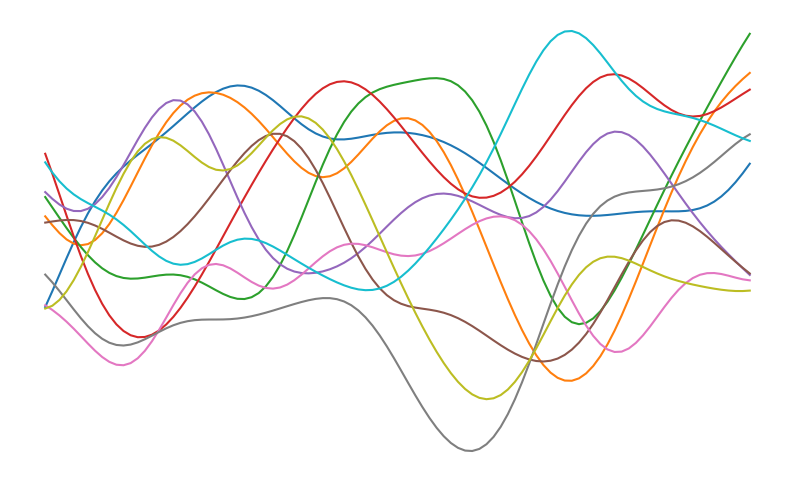

In [2]:
# RBF kernel (squared exponential)
def rbf_kernel(x1, x2, length_scale=1.0, sigma_f=1.0):
    sqdist = np.subtract.outer(x1, x2)**2
    return sigma_f**2 * np.exp(-0.5 / length_scale**2 * sqdist)

# Test inputs (evaluation points)
X = np.linspace(-5, 5, 100)

# Kernel parameters
length_scale = 1.0
sigma_f = 1.0

# Compute the covariance matrix for the prior
K_xx = rbf_kernel(X, X, length_scale, sigma_f)

# Draw samples from the prior (mean zero)
n_samples = 10
samples = np.random.multivariate_normal(mean=np.zeros(len(X)), cov=K_xx, size=n_samples)

plt.figure(figsize=(10, 6))
for i in range(n_samples):
    plt.plot(X, samples[i], lw=1.5, label=f"Sample {i+1}")

plt.axis('off')
plt.savefig('gp-1.png', dpi=300, bbox_inches='tight')

### Gaussian Process Regression

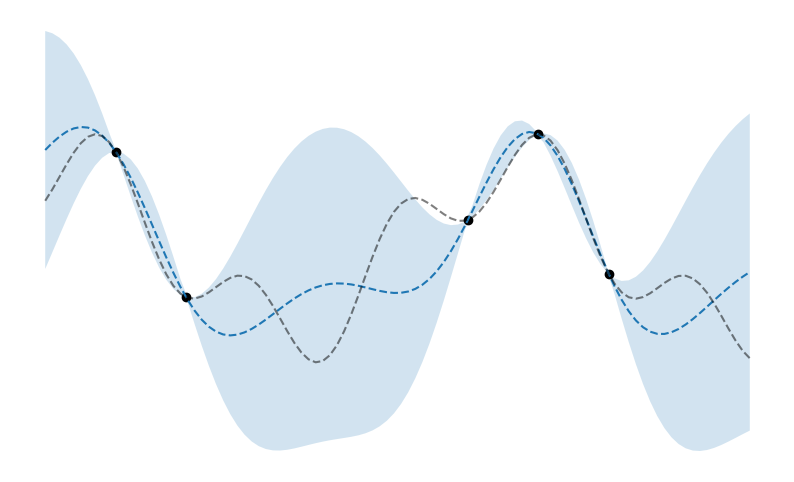

In [3]:
# RBF kernel (squared exponential)
def rbf_kernel(x1, x2, length_scale=1.0, sigma_f=1.0):
    """
    Compute the RBF kernel between vectors x1 and x2
    """
    sqdist = np.subtract.outer(x1, x2)**2
    return sigma_f**2 * np.exp(-0.5 / length_scale**2 * sqdist)

def true_function(x):
    return np.sin(x) + 0.5 * np.cos(3 * x)

# Generate training data
X_train = np.array([[-4], [-3], [1], [2], [3]]).reshape(-1)
y_train = true_function(X_train)

# Test points
X_test = np.linspace(-5, 5, 100)

# Kernel parameters
length_scale = 1.0
sigma_f = 1.0
sigma_y = 1e-8  # small noise for numerical stability

# Compute kernel matrices
K = rbf_kernel(X_train, X_train, length_scale, sigma_f) + sigma_y * np.eye(len(X_train))
K_s = rbf_kernel(X_train, X_test, length_scale, sigma_f)
K_ss = rbf_kernel(X_test, X_test, length_scale, sigma_f) + 1e-8 * np.eye(len(X_test))  # for stability

# Compute the posterior mean and covariance
K_inv = np.linalg.inv(K)
mu_s = K_s.T @ K_inv @ y_train
cov_s = K_ss - K_s.T @ K_inv @ K_s
std_s = np.sqrt(np.diag(cov_s))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(X_train, y_train, 'ko', label="Training points")
plt.plot(X_test, mu_s, color='#1f77b4', linestyle='--', label="Predictive mean")
plt.plot(X_test, true_function(X_test), 'k--', alpha=0.5, label="True function")
plt.fill_between(X_test, mu_s - 1.96 * std_s, mu_s + 1.96 * std_s, alpha=0.2, label="95% confidence interval")
plt.axis('off')
plt.savefig('gp-2.png', dpi=300, bbox_inches='tight')

### Draw individual samples

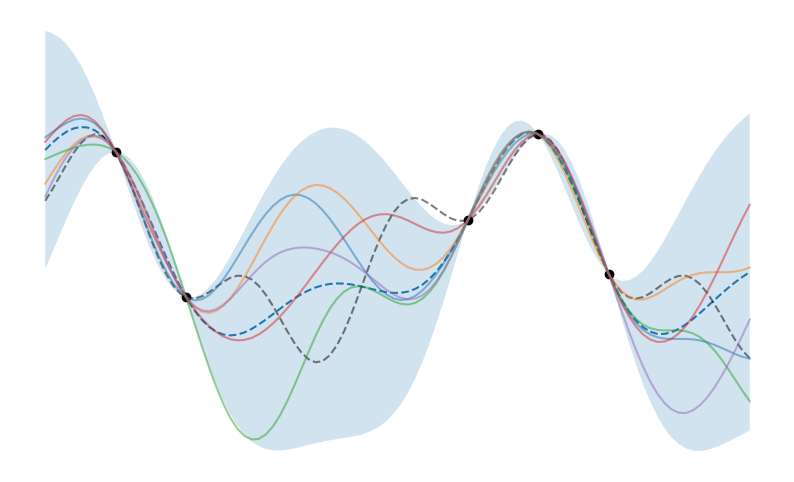

In [11]:
n_samples = 5
samples = np.random.multivariate_normal(mu_s, cov_s, size=n_samples)

plt.figure(figsize=(10, 6))
plt.plot(X_train, y_train, 'ko', label="Training points")
plt.plot(X_test, mu_s, color='#1f77b4', linestyle='--', label="Predictive mean")
plt.plot(X_test, true_function(X_test), 'k--', alpha=0.5, label="True function")
plt.fill_between(X_test, mu_s - 1.96 * std_s, mu_s + 1.96 * std_s, alpha=0.2)

for i in range(n_samples):
    plt.plot(X_test, samples[i], alpha=0.5, label=f"Sample {i+1}")

plt.axis('off')
plt.savefig('gp-3.png', dpi=300, bbox_inches='tight')